In [54]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from pymongo import MongoClient
import tensorflow as tf
import random
import pickle


In [55]:
tf.random.set_seed(17)
np.random.seed(17)
random.seed(17)

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import IncrementalPCA

In [57]:
connection = MongoClient('localhost' , 27017)
db = connection['mydb']
collection = db['Preprocessed_Lemmatized_Data']

In [58]:
cursor = collection.find({})

In [59]:
df = pd.DataFrame(list(cursor))

In [60]:
df.head()

,_id,review,word count,positive
0,6654671a51740e67c98a68bb,one reviewer mention watch 1 oz episode hook r...,307,1
1,6654671a51740e67c98a68bc,wonderful little production film technique una...,162,1
2,6654671a51740e67c98a68bd,I think wonderful way spend time hot summer we...,166,1
3,6654671a51740e67c98a68be,basically family little boy jake think zombie ...,138,0
4,6654671a51740e67c98a68bf,petter matteis love time money visually stunni...,230,1


In [61]:
df.rename(columns={'positive' : 'sentiment'} , inplace= True)

In [62]:
df.head()

,_id,review,word count,sentiment
0,6654671a51740e67c98a68bb,one reviewer mention watch 1 oz episode hook r...,307,1
1,6654671a51740e67c98a68bc,wonderful little production film technique una...,162,1
2,6654671a51740e67c98a68bd,I think wonderful way spend time hot summer we...,166,1
3,6654671a51740e67c98a68be,basically family little boy jake think zombie ...,138,0
4,6654671a51740e67c98a68bf,petter matteis love time money visually stunni...,230,1


In [63]:
tfidf_vectorizer = TfidfVectorizer()

In [64]:
tfidf_matrix = tfidf_vectorizer.fit_transform(df['review'])

In [65]:
print(tfidf_matrix)

  (0, 161660)	0.04873421335480214
  (0, 44590)	0.0488319350034118
  (0, 182620)	0.05237445651389767
  (0, 191631)	0.13353867420800106
  (0, 186779)	0.07535305971325
  (0, 37620)	0.077124941959065
  (0, 19473)	0.037783361385043956
  (0, 111337)	0.03899655486983426
  (0, 61499)	0.04796060218225525
  (0, 163043)	0.0624696954100122
  (0, 170548)	0.05500063937161931
  (0, 100405)	0.045475183223228424
  (0, 22246)	0.08280950429131573
  (0, 185081)	0.03717382413369462
  (0, 35372)	0.055087294586458946
  (0, 114134)	0.05455984961395798
  (0, 109473)	0.09443599290020586
  (0, 195197)	0.022943895941392553
  (0, 16183)	0.040551788308519854
  (0, 129374)	0.050508540613527386
  (0, 98366)	0.04039224369977632
  (0, 90863)	0.17341677575368394
  (0, 123094)	0.11203452333713851
  (0, 157730)	0.05944277567763646
  (0, 77932)	0.06936431987191777
  :	:
  (49999, 89738)	0.09841615771485451
  (49999, 168341)	0.08337897751390906
  (49999, 17038)	0.0589800839552253
  (49999, 102356)	0.08068666634121748
  (499

In [66]:
tfidf_matrix.shape

(50000, 202839)

In [67]:
n_components = 500  # Number of components to retain
svd = TruncatedSVD(n_components=n_components)
tfidf_matrix_reduced = svd.fit_transform(tfidf_matrix)

### Saving SVD to use for new data

In [68]:
with open('tfidf_svd.pkl' , 'wb') as file:
 pickle.dump(svd , file)

In [69]:
with open('tfidf_vectorizer.pkl' , 'wb') as file:
 pickle.dump(tfidf_vectorizer , file)

In [70]:
tfidf_matrix_reduced.shape

(50000, 500)

In [71]:
type(tfidf_matrix_reduced)

numpy.ndarray

In [72]:
dense_df = pd.DataFrame(tfidf_matrix_reduced)

In [73]:
dense_df

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.141576,-0.036418,0.112312,0.077215,0.010776,-0.022671,0.025328,-0.009743,0.051106,-0.047037,...,0.018741,-0.012420,0.014063,-0.004789,-0.009173,-0.007173,-0.007492,0.027346,0.022097,0.049629
1,0.124229,-0.055126,0.012771,-0.024037,-0.015741,0.045569,-0.011459,0.012698,-0.016632,0.008526,...,0.012929,-0.005870,0.001185,-0.002272,-0.011250,-0.001025,0.003090,0.000892,0.004572,-0.001378
2,0.145461,-0.021491,0.044107,-0.002749,0.020317,0.003905,-0.048123,0.014579,-0.040483,0.007776,...,-0.000495,0.030109,0.006822,-0.011615,-0.002884,-0.019001,-0.007132,-0.014802,-0.021711,0.010675
3,0.144826,0.014747,-0.017303,-0.035918,-0.003923,-0.037186,-0.012771,-0.009178,0.009983,-0.028246,...,-0.014965,0.021775,-0.022873,-0.017860,-0.044711,0.000011,0.017659,-0.023472,0.002019,0.027327
4,0.188224,-0.054816,0.029979,-0.032145,-0.025050,-0.005986,0.016297,0.023064,-0.019109,-0.009281,...,0.006341,0.000550,0.009056,0.027479,-0.008374,-0.015282,0.008373,0.002709,-0.003449,-0.007403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.256317,0.129274,0.023419,-0.057486,0.080278,-0.051711,-0.051155,-0.001446,0.044862,0.047302,...,-0.014303,-0.007570,0.003095,0.013490,-0.003624,0.027202,-0.014147,0.009728,0.008184,0.007016
49996,0.115483,0.035534,-0.057421,0.133675,-0.020289,0.049092,0.039948,0.076084,-0.057573,0.042120,...,-0.011391,-0.011772,0.014659,-0.004763,-0.002845,-0.006972,0.019352,0.013059,-0.002985,-0.034184
49997,0.135147,-0.010526,0.037684,-0.005528,-0.036634,-0.051319,0.023759,0.041161,-0.051918,0.001855,...,0.023269,0.012606,-0.032540,-0.009481,-0.005753,-0.019194,0.037068,0.005641,-0.011074,-0.028100
49998,0.121168,-0.045427,0.014710,-0.000329,-0.049003,0.001966,-0.003339,0.003751,0.014352,0.001278,...,-0.006615,0.005311,0.001111,0.014543,0.015707,0.000636,0.002897,0.010751,0.001828,-0.000606


In [74]:
dense_df.iloc[0 ,:]

0      0.141576
1     -0.036418
2      0.112312
3      0.077215
4      0.010776
         ...   
495   -0.007173
496   -0.007492
497    0.027346
498    0.022097
499    0.049629
Name: 0, Length: 500, dtype: float64

In [75]:
X = dense_df
y = df['sentiment']

In [76]:
(X_train , X_test , y_train , y_test) = train_test_split(X,y,test_size=0.2)

In [77]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
2661,0.192779,0.084684,0.021492,-0.005487,-0.024752,0.029700,-0.078645,0.000009,-0.024196,-0.025966,...,0.012919,-0.001527,-0.036693,0.008582,0.001781,-0.038323,-0.015754,0.031948,-0.012844,0.000467
7062,0.235048,0.106351,0.186187,0.074268,0.125708,0.003279,0.050604,-0.069484,0.115665,-0.151172,...,-0.008420,0.012522,-0.014628,-0.026543,-0.024490,-0.007918,0.004747,-0.016507,-0.023191,0.065684
3497,0.264130,0.081474,0.008303,-0.069019,-0.037357,-0.021383,0.067771,-0.103719,-0.017101,-0.029040,...,-0.008833,0.010366,0.029989,0.023686,0.011023,0.002419,0.000023,-0.014492,0.002272,-0.001967
20720,0.170274,0.057369,0.027854,-0.039435,0.015562,-0.021797,-0.012731,-0.011544,-0.014816,0.010279,...,-0.003207,0.012283,0.010663,0.000238,-0.019119,-0.022367,0.013587,-0.007047,-0.001738,-0.007380
13972,0.245105,0.077961,-0.000620,0.055158,-0.065081,-0.005040,-0.047025,-0.088030,-0.007266,0.054792,...,-0.008590,-0.018406,-0.000059,0.014452,0.000133,0.009743,0.028766,-0.003317,-0.009941,0.023364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11244,0.262913,0.006815,0.037636,-0.056211,-0.070514,-0.002606,0.007568,0.058499,0.024070,-0.006230,...,0.005571,0.017896,-0.001002,0.000268,0.019652,0.012961,-0.014390,-0.010126,0.003500,-0.037714
6644,0.220335,-0.127229,-0.043091,-0.033643,-0.004194,0.052367,-0.020178,0.016846,0.006207,-0.008345,...,-0.009470,-0.021698,0.007820,0.022023,0.019086,-0.002957,0.018912,-0.014087,-0.014517,0.025626
44514,0.196931,0.096888,-0.000493,-0.023785,0.011970,-0.019045,0.003347,0.012875,0.044579,-0.022689,...,-0.003564,-0.012049,-0.009939,0.022902,-0.003656,-0.002484,0.002728,-0.022171,0.000028,-0.010077
22123,0.200336,-0.083746,0.058721,0.046367,0.037162,0.039529,0.027074,-0.061374,0.038917,0.006082,...,-0.007201,0.018544,-0.005026,-0.025175,0.027505,0.008080,-0.004205,0.003938,-0.002781,0.005174


In [78]:
y_train

3730     1
8892     1
26708    1
47527    0
44644    1
        ..
521      1
11011    1
40414    1
3388     1
6538     1
Name: sentiment, Length: 40000, dtype: int64

## Creating Neural Network Model

In [79]:
sns_model =tf.keras.Sequential()

sns_model.add(tf.keras.layers.Flatten(input_shape = (500,)))
# sns_model.add(tf.keras.layers.Dense(32 , activation='relu'))
sns_model.add(tf.keras.layers.Dense(64 , activation= 'relu'))
sns_model.add(tf.keras.layers.Dense(1 , activation='sigmoid'))

c:\Users\Nitro 5\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [80]:
sns_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        32,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,129 (125.50 KB)

 Trainable params: 32,129 (125.50 KB)

 Non-trainable params: 0 (0.00 B)

In [81]:
X_train.iloc[0].shape 

(500,)

In [82]:
sns_model.compile(optimizer='adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])
sns_model_history = sns_model.fit(X_train , y_train , validation_split=0.2 , batch_size= 900 , epochs= 12)



Epoch 1/12
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6234 - loss: 0.6877 - val_accuracy: 0.7639 - val_loss: 0.6700
Epoch 2/12
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7948 - loss: 0.6580 - val_accuracy: 0.7976 - val_loss: 0.6250
Epoch 3/12
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8115 - loss: 0.6070 - val_accuracy: 0.8045 - val_loss: 0.5704
Epoch 4/12
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8176 - loss: 0.5501 - val_accuracy: 0.8130 - val_loss: 0.5201
Epoch 5/12
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8253 - loss: 0.4997 - val_accuracy: 0.8189 - val_loss: 0.4792
Epoch 6/12
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8307 - loss: 0.4594 - val_accuracy: 0.8296 - val_loss: 0.4472
Epoch 7/12
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8384 - loss: 0.4281 - val_accuracy: 0.8351 - val_loss: 0.4221
Epoch 8/12
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8459 - loss: 0.4035 - val_accuracy: 0.8386 - val_loss:

In [83]:
sentiment_score = sns_model.evaluate(X_test , y_test , verbose= 1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - accuracy: 0.8470 - loss: 0.3615


In [84]:
with open('snn_model_tfidf' , 'wb') as file:
 pickle.dump(sns_model , file)

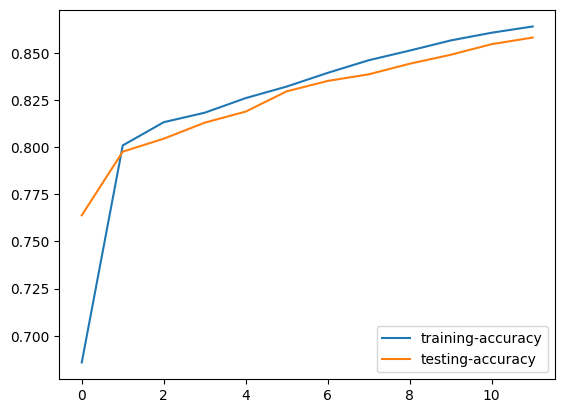

In [85]:
plt.plot(sns_model_history.history['accuracy'] , label = 'training-accuracy')
plt.plot(sns_model_history.history['val_accuracy'] , label = 'testing-accuracy')
plt.legend(loc ='lower right')

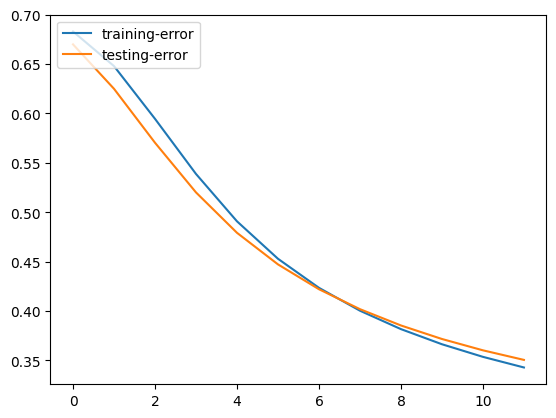

In [86]:
plt.plot(sns_model_history.history['loss'] , label = 'training-error')
plt.plot(sns_model_history.history['val_loss'] , label = 'testing-error')
plt.legend(loc ='upper left')

In [87]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
2661,0.192779,0.084684,0.021492,-0.005487,-0.024752,0.029700,-0.078645,0.000009,-0.024196,-0.025966,...,0.012919,-0.001527,-0.036693,0.008582,0.001781,-0.038323,-0.015754,0.031948,-0.012844,0.000467
7062,0.235048,0.106351,0.186187,0.074268,0.125708,0.003279,0.050604,-0.069484,0.115665,-0.151172,...,-0.008420,0.012522,-0.014628,-0.026543,-0.024490,-0.007918,0.004747,-0.016507,-0.023191,0.065684
3497,0.264130,0.081474,0.008303,-0.069019,-0.037357,-0.021383,0.067771,-0.103719,-0.017101,-0.029040,...,-0.008833,0.010366,0.029989,0.023686,0.011023,0.002419,0.000023,-0.014492,0.002272,-0.001967
20720,0.170274,0.057369,0.027854,-0.039435,0.015562,-0.021797,-0.012731,-0.011544,-0.014816,0.010279,...,-0.003207,0.012283,0.010663,0.000238,-0.019119,-0.022367,0.013587,-0.007047,-0.001738,-0.007380
13972,0.245105,0.077961,-0.000620,0.055158,-0.065081,-0.005040,-0.047025,-0.088030,-0.007266,0.054792,...,-0.008590,-0.018406,-0.000059,0.014452,0.000133,0.009743,0.028766,-0.003317,-0.009941,0.023364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11244,0.262913,0.006815,0.037636,-0.056211,-0.070514,-0.002606,0.007568,0.058499,0.024070,-0.006230,...,0.005571,0.017896,-0.001002,0.000268,0.019652,0.012961,-0.014390,-0.010126,0.003500,-0.037714
6644,0.220335,-0.127229,-0.043091,-0.033643,-0.004194,0.052367,-0.020178,0.016846,0.006207,-0.008345,...,-0.009470,-0.021698,0.007820,0.022023,0.019086,-0.002957,0.018912,-0.014087,-0.014517,0.025626
44514,0.196931,0.096888,-0.000493,-0.023785,0.011970,-0.019045,0.003347,0.012875,0.044579,-0.022689,...,-0.003564,-0.012049,-0.009939,0.022902,-0.003656,-0.002484,0.002728,-0.022171,0.000028,-0.010077
22123,0.200336,-0.083746,0.058721,0.046367,0.037162,0.039529,0.027074,-0.061374,0.038917,0.006082,...,-0.007201,0.018544,-0.005026,-0.025175,0.027505,0.008080,-0.004205,0.003938,-0.002781,0.005174


In [88]:
results_sns = sns_model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step


In [89]:
type(results_sns)

numpy.ndarray

In [90]:
results_df = pd.DataFrame(results_sns , columns=['predicted sentiment'])

In [91]:
results_df

,predicted sentiment
0,0.450667
1,0.676307
2,0.186533
3,0.647445
4,0.004575
...,...
9995,0.265019
9996,0.973702
9997,0.136816
9998,0.419587


In [92]:
results_df['predicted sentiment'] = results_df['predicted sentiment'].apply(lambda value : value * 10)

In [93]:
results_df

,predicted sentiment
0,4.506674
1,6.763065
2,1.865331
3,6.474446
4,0.045748
...,...
9995,2.650194
9996,9.737022
9997,1.368163
9998,4.195869


In [94]:
def evaluate_value(data):
 if data > 5:
  return "Positive"
 elif data < 5:
  return "Negative"
 else:
  return "Neutral"

In [95]:
results_df['predicted sentiment'] = results_df['predicted sentiment'].apply(lambda value : evaluate_value(value))

In [96]:
results_df

,predicted sentiment
0,Negative
1,Positive
2,Negative
3,Positive
4,Negative
...,...
9995,Negative
9996,Positive
9997,Negative
9998,Negative


In [97]:
X_test.index

Index([ 2661,  7062,  3497, 20720, 13972, 18107,  8218,  4223, 14233, 45388,
       ...
       38563, 26647, 36794, 26597, 22663, 11244,  6644, 44514, 22123, 27123],
      dtype='int64', length=10000)

In [98]:
def find_index(num):
 return X_test.index[num]

In [99]:
df.iloc[11701]

_id                                    6654671a51740e67c98a9670
review        atmosphere droll dialog redeem overrate classi...
word count                                                  217
sentiment                                                     0
Name: 11701, dtype: object

In [100]:
test_list = []

for index in range(0,len(X_test)):
 real_index = find_index(index)
 test_list.append(df.iloc[real_index])


In [101]:
test_list[1]

_id                                    6654671a51740e67c98a8451
review        one horror movie base tv show get right friday...
word count                                                  220
sentiment                                                     1
Name: 7062, dtype: object

In [102]:
test_df = pd.DataFrame(test_list , index = range(0,len(X_test)))

In [103]:
test_df

,_id,review,word count,sentiment
0,6654671a51740e67c98a7320,sequel 1989 actioncomedy classic k9 detective ...,242,1
1,6654671a51740e67c98a8451,one horror movie base tv show get right friday...,220,1
2,6654671a51740e67c98a7664,I watch movie one usual time real real late ni...,145,1
3,6654671b51740e67c98ab9ab,great cast movie timing excellent many clever ...,81,1
4,6654671b51740e67c98a9f4f,ok I friend rent day ago like keep track bmovi...,268,0
...,...,...,...,...
9995,6654671a51740e67c98a94a7,funny I find force review movie I ami review r...,844,0
9996,6654671a51740e67c98a82af,damn good little ninety thriller perhaps lack ...,413,1
9997,6654671c51740e67c98b169d,I see movie month ago town appear greendale mo...,204,0
9998,6654671b51740e67c98abf26,big fan ten minute tv episode stella street I ...,299,0


In [104]:
comparision_df = pd.concat([test_df, results_df ] , axis = 1)

In [105]:
comparision_df.head(10)

,_id,review,word count,sentiment,predicted sentiment
0,6654671a51740e67c98a7320,sequel 1989 actioncomedy classic k9 detective ...,242,1,Negative
1,6654671a51740e67c98a8451,one horror movie base tv show get right friday...,220,1,Positive
2,6654671a51740e67c98a7664,I watch movie one usual time real real late ni...,145,1,Negative
3,6654671b51740e67c98ab9ab,great cast movie timing excellent many clever ...,81,1,Positive
4,6654671b51740e67c98a9f4f,ok I friend rent day ago like keep track bmovi...,268,0,Negative
5,6654671b51740e67c98aaf76,robot jox try hard fundamentally series fight ...,338,1,Negative
6,6654671a51740e67c98a88d5,see aristocat special edition two pack fox hou...,496,1,Positive
7,6654671a51740e67c98a793a,movie horrible acting waste basket cry action ...,225,0,Negative
8,6654671b51740e67c98aa054,I go see antone fisher know expect pleasantly ...,70,1,Positive
9,6654671c51740e67c98b1a07,I like victor herbert I like mary martin allan...,257,1,Positive
